/workspaces/DL-Exccersize/notebooks/DL_master_20240707/ch06
/workspaces/DL-Exccersize/notebooks/DL_master_20240707
train loss:2.300061998054956
=== epoch:1, train acc:0.21, test acc:0.196 ===
train loss:2.297471972541799
train loss:2.294817959246826
train loss:2.285731778726353
train loss:2.2764528563173827
train loss:2.2691441388074387
train loss:2.263112342796445
train loss:2.2384889639595387
train loss:2.230192480131886
train loss:2.199690548446269
train loss:2.170583856587566
train loss:2.15662485642755
train loss:2.099995629312573
train loss:2.0002813170615745
train loss:1.9822729310542584
train loss:1.9128376386853996
train loss:1.886686701587083
train loss:1.787201907355224
train loss:1.6911068783183274
train loss:1.624225058824322
train loss:1.5099549983963276
train loss:1.3949272444239045
train loss:1.3460266389639932
train loss:1.2593135266014372
train loss:1.2045059135761567
train loss:1.1786945903323665
train loss:1.0867274511722709
train loss:1.032987750592352
train loss:0

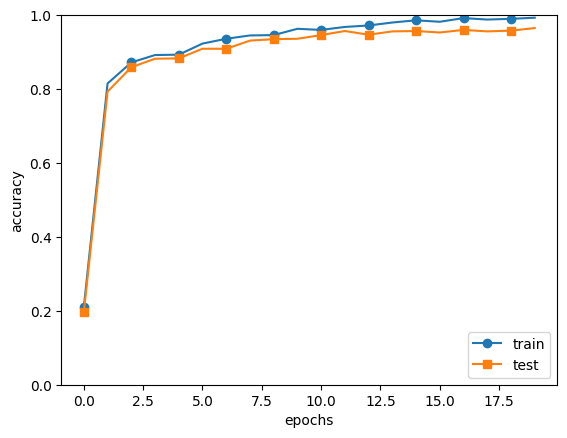

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch06.simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
